In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
r = {'width': [1.4, 1, 0.75, 0.5, 1, 1, 1], 
     'res': [224, 224, 224, 224, 192, 160, 128], 
     'IOU=0.5': [0.140, 0.127, 0.123, 0.091, 0.112, 0.091, 0.059], 
     'IOU=0.75':[0.075,0.068, 0.061, 0.046, 0.057, 0.040, 0.026], 
     'IOU=0.5:0.95':[0.076,0.071,0.066, 0.050, 0.060, 0.047, 0.030], 
     'speed':[0.136,0.085,0.084, 0.070, 0.186, 0.070, 0.070]}
df = pd.DataFrame(data=r)
df

,width,res,IOU=0.5,IOU=0.75,IOU=0.5:0.95,speed
0,1.40,224,0.140,0.075,0.076,0.136
1,1.00,224,0.127,0.068,0.071,0.085
2,0.75,224,0.123,0.061,0.066,0.084
3,0.50,224,0.091,0.046,0.050,0.070
4,1.00,192,0.112,0.057,0.060,0.186
5,1.00,160,0.091,0.040,0.047,0.070
6,1.00,128,0.059,0.026,0.030,0.070


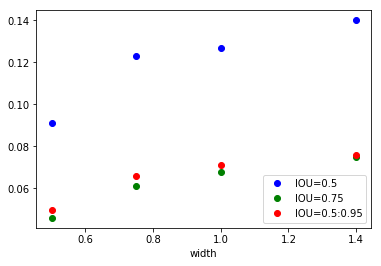

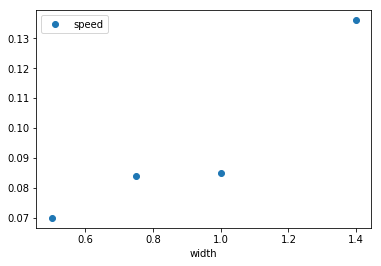

In [43]:
# varying width, constant resolution with different IoUs
ap_width = df.loc[df['res']==224]
ax = ap_width.plot(x='width', y='IOU=0.5', style='bo')
ap_width.plot(ax=ax, x='width', y='IOU=0.75', style='go')
ap_width.plot(ax=ax, x='width', y='IOU=0.5:0.95', style='ro')
ax.legend()

speed_width = df.loc[df['res']==224]
speed_width.plot(x='width', y='speed', style='o')

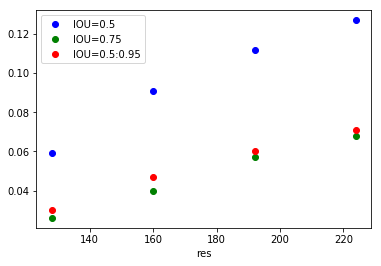

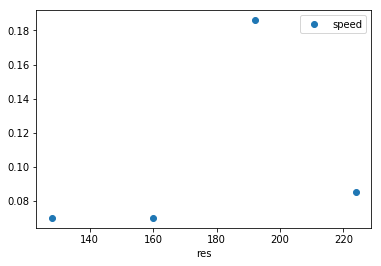

In [42]:
# varying resolution, constant width with different IoUs
ap_res = df.loc[df['width']==1]
ax = ap_res.plot(x='res', y='IOU=0.5', style='bo')
ap_res.plot(ax=ax, x='res', y='IOU=0.75', style='go')
ap_res.plot(ax=ax, x='res', y='IOU=0.5:0.95', style='ro')
ax.legend()

speed_res = df.loc[df['width']==1]
speed_res.plot(x='res', y='speed', style='o')

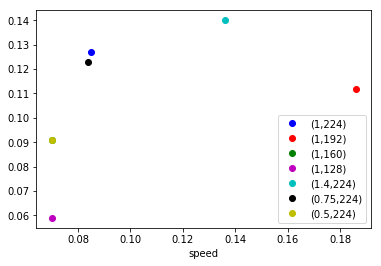

In [39]:
# speed vs accuracy for all models 
ax = df.loc[(df['width']==1) & (df['res']==224)].plot(x='speed', y='IOU=0.5', style='bo',label='(1,224)')
df.loc[(df['width']==1) & (df['res']==192)].plot(ax=ax, x='speed', y='IOU=0.5', style='ro', label='(1,192)')
df.loc[(df['width']==1) & (df['res']==160)].plot(ax=ax, x='speed', y='IOU=0.5', style='go', label='(1,160)')
df.loc[(df['width']==1) & (df['res']==128)].plot(ax=ax, x='speed', y='IOU=0.5', style='mo', label='(1,128)')
df.loc[(df['width']==1.4) & (df['res']==224)].plot(ax=ax, x='speed', y='IOU=0.5', style='co', label='(1.4,224)')
df.loc[(df['width']==0.75) & (df['res']==224)].plot(ax=ax, x='speed', y='IOU=0.5', style='ko', label='(0.75,224)')
df.loc[(df['width']==0.5) & (df['res']==224)].plot(ax=ax, x='speed', y='IOU=0.5', style='yo', label='(0.5,224)')
ax.legend()